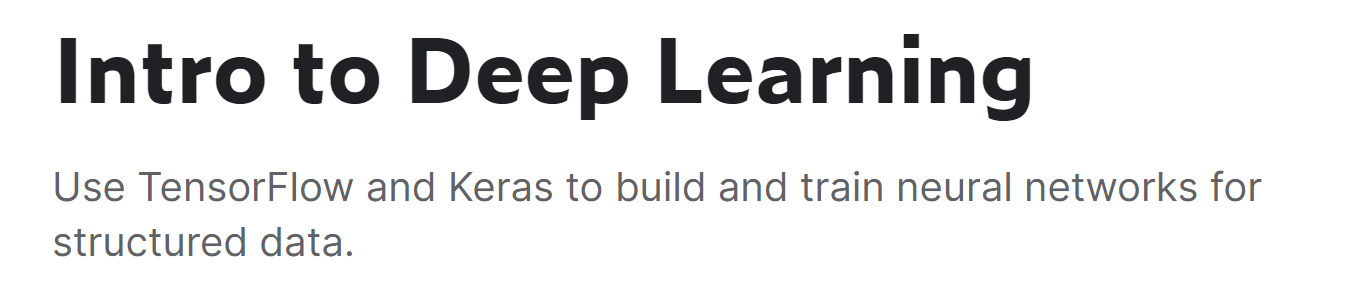

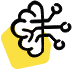

The bias enables the neuron to modify the output independently of its inputs.

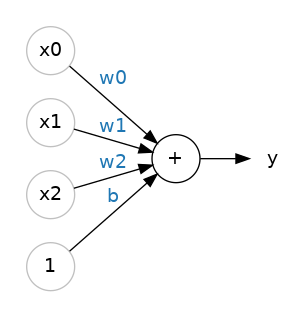

The formula for this neuron would be  **y = w0x0 + w1x1 + w2x2 + b**

In [3]:
# If you haven't installed this libraries yet

# !pip install tensorflow
# !pip install keras

In [2]:
# Linear model accepting three input features

from tensorflow import keras
from tensorflow.keras import layers

# Create a network with 1 linear unit
model = keras.Sequential(layers=[
    layers.Dense(units=1, input_shape=[3])])

# [The Sequential class](https://keras.io/api/models/sequential/)

# [Dense layer](https://keras.io/api/layers/core_layers/dense/)

With the first argument, **units**, we define how many outputs we want. In this case we are just predicting 'calories', so we'll use units=1.

With the second argument, **input_shape**, we tell Keras the dimensions of the inputs. Setting input_shape=[3] ensures the model will accept three features as input ('sugars', 'fiber', and 'protein').

# Layers

Neural networks typically organize their neurons into **layers**. When we collect together linear units having a common set of inputs we get a **dense** layer.

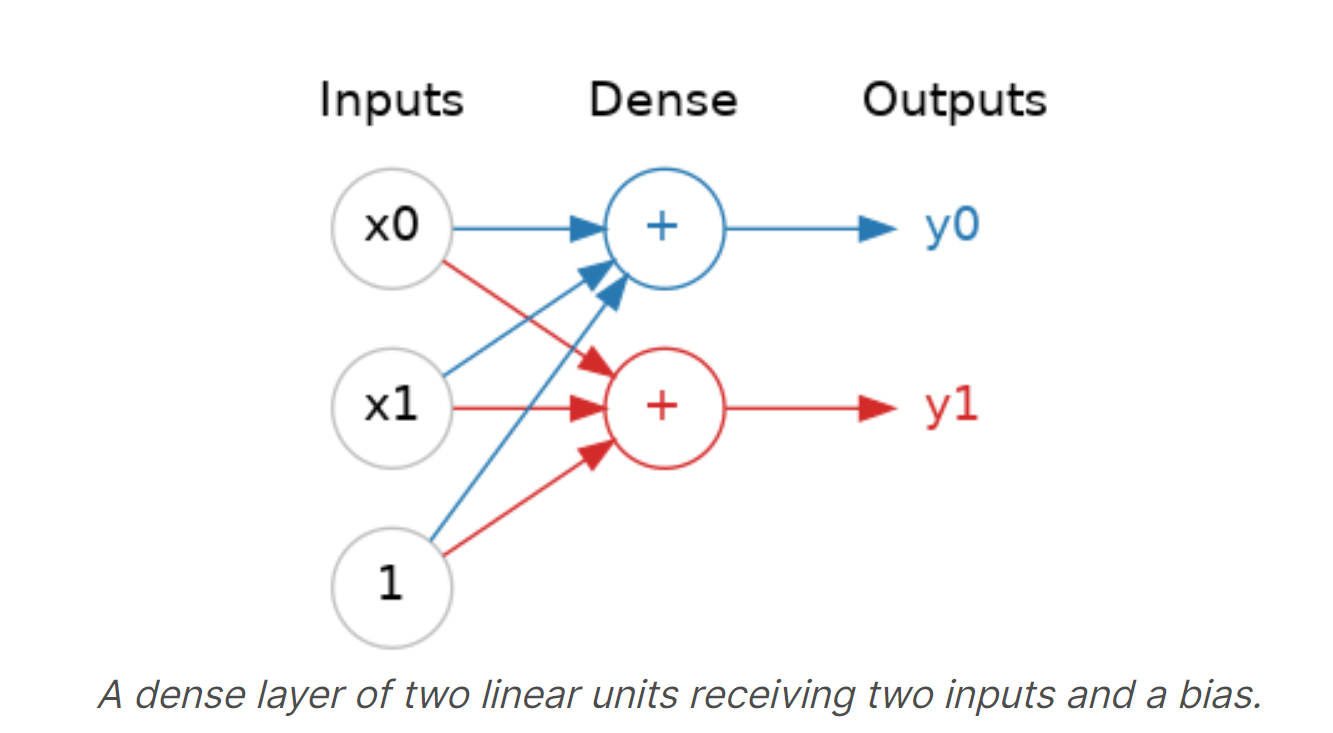

Without activation functions, neural networks can only learn linear relationships. In order to fit curves, we'll need to use activation functions.

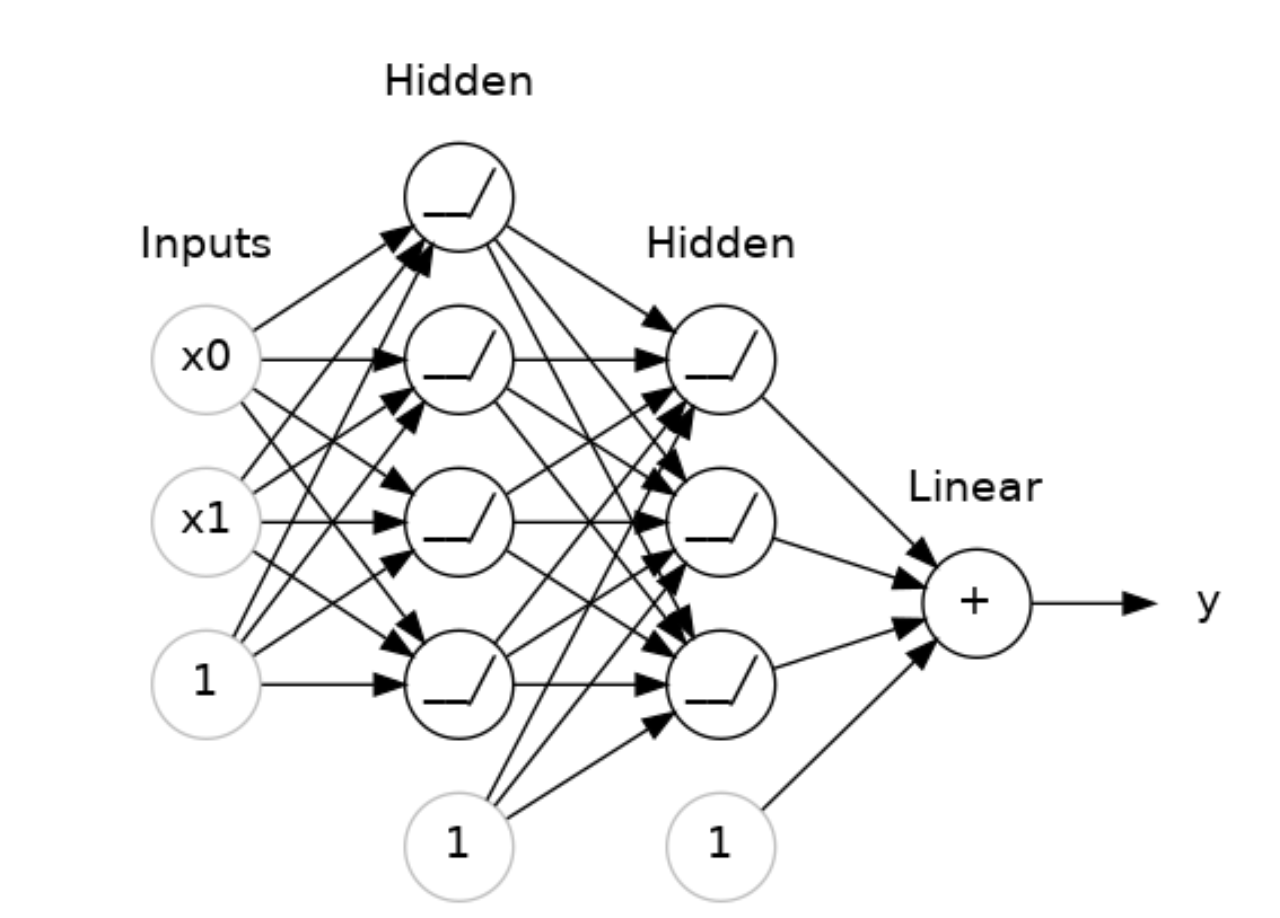

*A stack of dense layers makes a "fully-connected" network.*

In [5]:
# Building Sequential Models

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    layers.Dense(units=1)
])